In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
bb=pd.read_csv('baseball.csv')

In [3]:
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
bb.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
bb.shape

(30, 17)

In [7]:
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W         AxesSubplot(0.125,0.657941;0.0945122x0.222059)
R      AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
AB     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
H      AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
2B     AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
3B     AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
HR     AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
BB        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
SO     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
SB     AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
RA     AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
ER     AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
ERA    AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
CG     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
SHO          AxesSubplot(0.125,0.125;0.0945122x0.222059)
SV        AxesSubplot(0.238415,0.125;0.0945122x0.222059)
E         AxesSubplot(0.351829,0.125;0.0945122x0.222059)
dtype: object

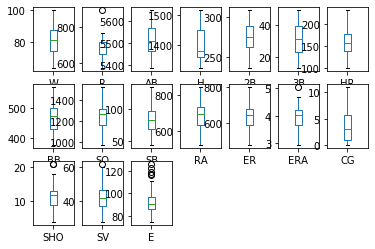

In [12]:
bb.plot(kind='box',subplots=True,layout=(3,7))

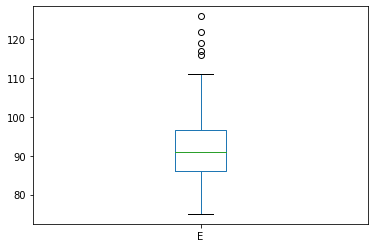

In [13]:
bb['E'].plot.box()

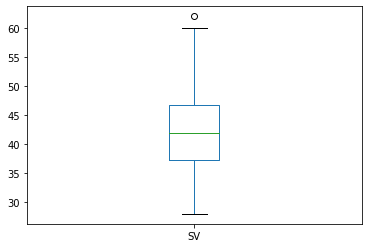

In [14]:
bb['SV'].plot.box()

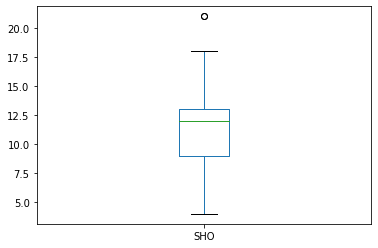

In [15]:
bb['SHO'].plot.box()

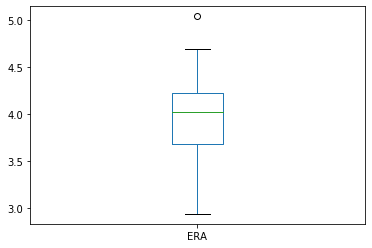

In [16]:
bb['ERA'].plot.box()

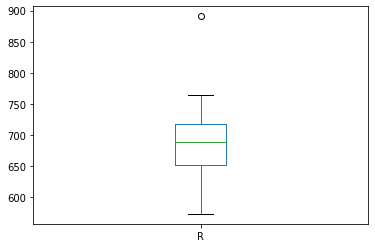

In [17]:
bb['R'].plot.box()

In [18]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(bb))

In [19]:
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [20]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [21]:
z[5][1]

3.5096470447193067

In [22]:
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [23]:
skew=('W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E')
for col in skew :
    if bb.skew().loc[col]>0.55:
        bb[col] = np.log1p(bb[col])

In [24]:
bb.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

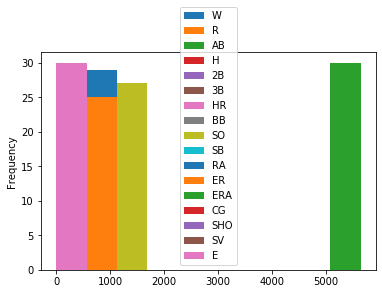

In [25]:
bb.plot.hist()

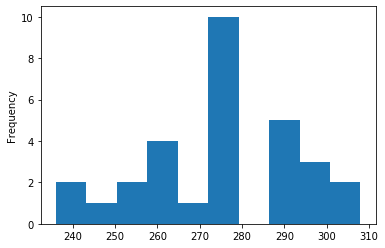

In [26]:
bb['2B'].plot.hist()

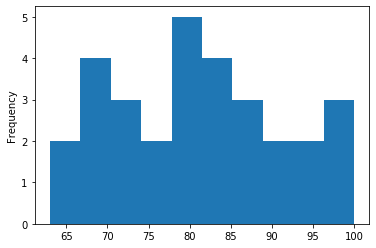

In [27]:
bb['W'].plot.hist()

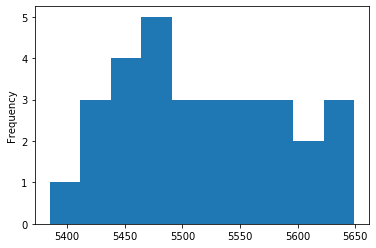

In [28]:
bb['AB'].plot.hist()

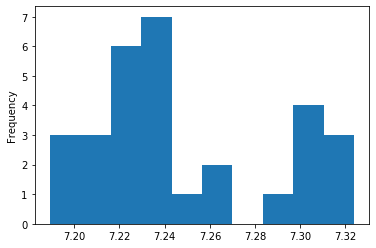

In [29]:
bb['H'].plot.hist()

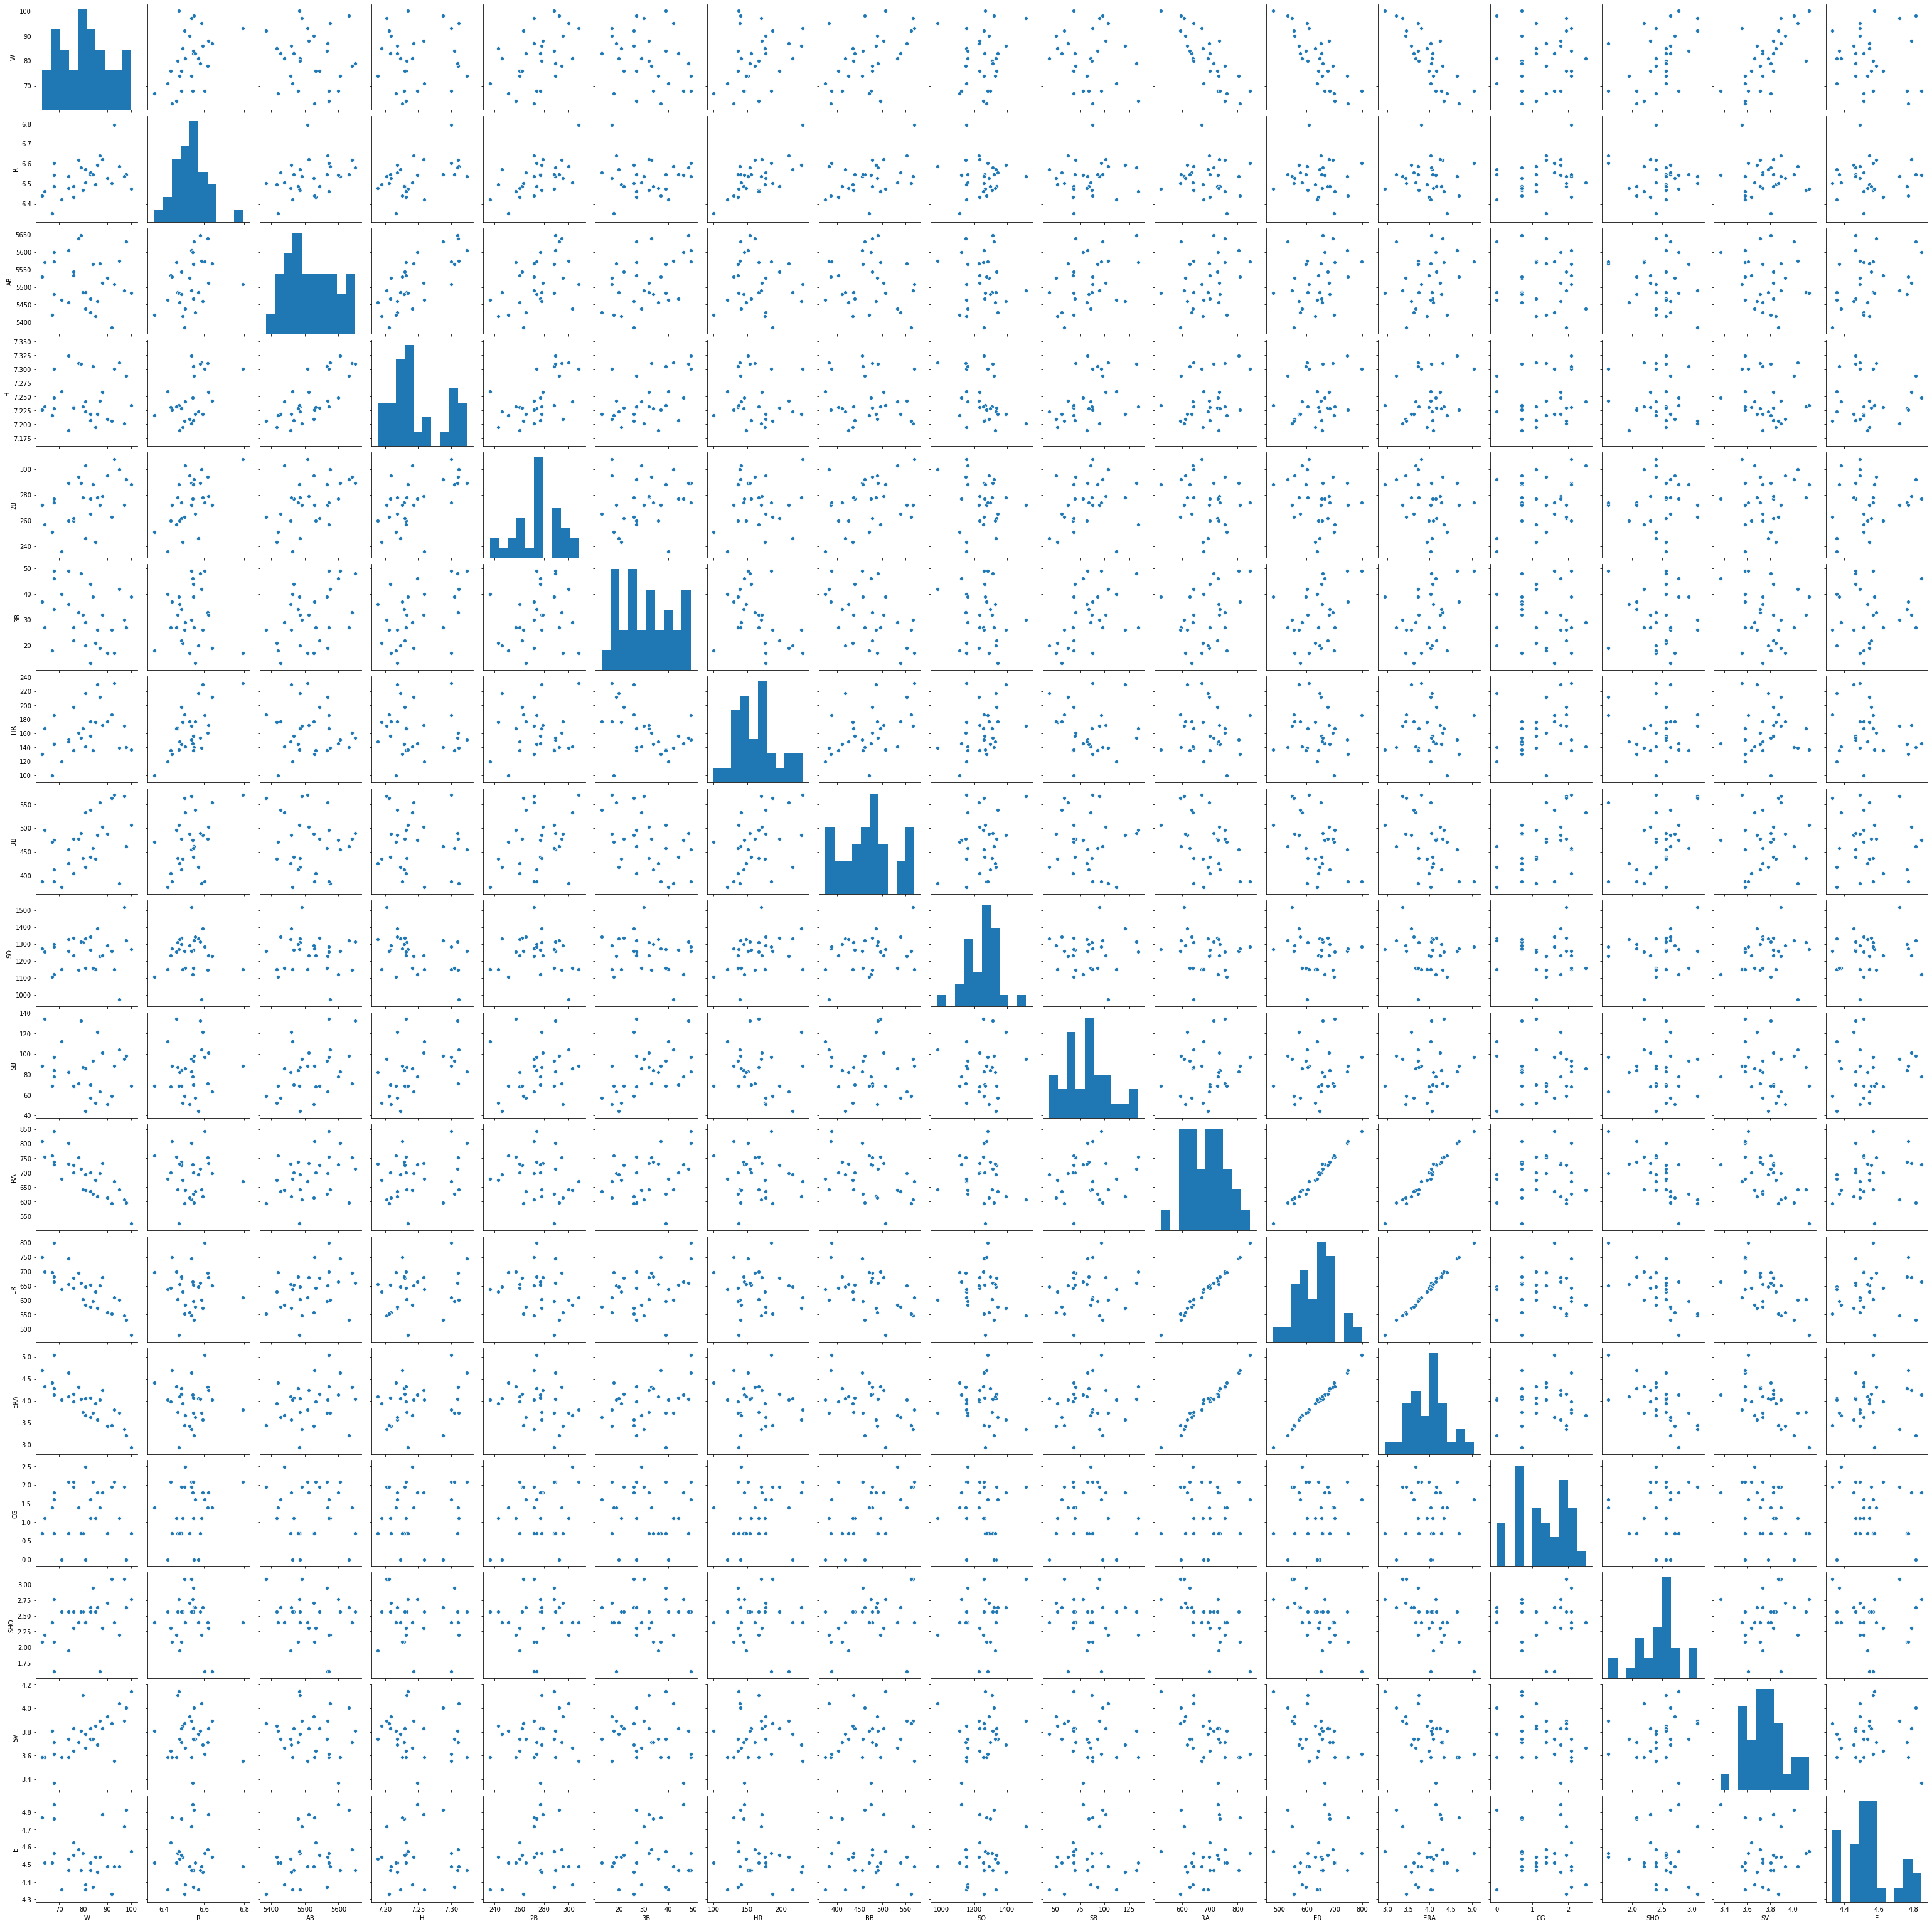

In [30]:
sns.pairplot(bb)

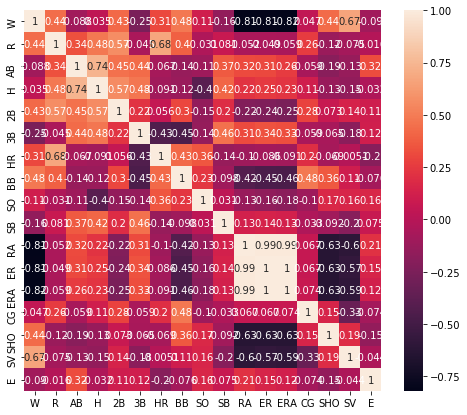

In [31]:
corr_hmap=bb.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [32]:
bb_new=bb[(z<3).all(axis=1)]

In [33]:
#outliers have been removed
bb_new.shape

(29, 17)

In [34]:
bb.shape

(30, 17)

In [35]:
bb=bb_new
bb.shape

(29, 17)

In [36]:
x=bb.iloc[:,0:-1]
x.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519


In [37]:
y=bb.iloc[:,-1]
y.head()

0    4.488636
1    4.465908
2    4.382027
3    4.624973
4    4.465908
Name: E, dtype: float64

In [38]:
x.shape

(29, 16)

In [39]:
y.shape

(29,)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [41]:
x_train.shape

(19, 16)

In [42]:
y_train.shape

(19,)

In [43]:
x_test.shape

(10, 16)

In [44]:
y_test.shape

(10,)

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.coef_

array([ 3.15375715e-02, -1.26713490e+00, -1.29236216e-03,  5.38276548e-01,
        1.80705685e-03, -1.53366030e-02, -6.57328458e-03, -5.19718474e-04,
        1.80556518e-03,  3.59183922e-03, -7.10499902e-03,  1.33381924e-02,
       -3.95234600e-01, -3.56195960e-02, -2.87086780e-01, -2.25664011e-01])

In [48]:
lm.intercept_

11.77176729956339

In [49]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [50]:
lm.score(x_train,y_train)

0.9272195806051756

In [51]:
#predict the value

In [52]:
pred=lm.predict(x_test)
print('Predicted no of wins:',pred)
print('actual price',y_test)

Predicted no of wins: [4.62718871 4.82295738 4.47871745 4.80758731 4.16466711 4.74777207
 4.58987142 4.47420041 4.42819807 3.59894224]
actual price 28    4.532599
17    4.718499
13    4.553877
23    4.510860
9     4.584967
10    4.787492
22    4.356709
0     4.488636
27    4.465908
14    4.844187
Name: E, dtype: float64


In [53]:
print('Error')

print('Mean absolute error:',mean_absolute_error(y_test,pred))

print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))



Error
Mean absolute error: 0.256150845289584
Mean squared error: 0.1898415050653867
Root mean squared error: 0.43570805026460857


In [54]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-8.005941954289733


In [59]:
#predict the wins
t=np.array([95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56])

In [60]:
t.shape

(16,)

In [68]:
td=t.reshape(1,-1)

In [69]:
lm.predict(td)

array([-116.144543])